In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cd2a5fb93edc5619ae9c7da7a5d25c8c


In [24]:
# Create an empty list to hold the weather data.
city_data = []
city_data_new_df = [] #Creating an empty Data Frame to hold the array of dcitionaries into a data frame.
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [13]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [18]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    

Processing Record 14 of Set 37 | aljezur
Processing Record 15 of Set 37 | hobart
Processing Record 16 of Set 37 | avarua
Processing Record 17 of Set 37 | saint-michel-des-saints
Processing Record 18 of Set 37 | mataura
Processing Record 19 of Set 37 | reefton
Processing Record 20 of Set 37 | bolungarvik
Processing Record 21 of Set 37 | atuona
Processing Record 22 of Set 37 | nelson bay
Processing Record 23 of Set 37 | viedma
Processing Record 24 of Set 37 | rikitea
Processing Record 25 of Set 37 | new norfolk
Processing Record 26 of Set 37 | punta arenas
Processing Record 27 of Set 37 | dutse
Processing Record 28 of Set 37 | pouebo
Processing Record 29 of Set 37 | sorland
Processing Record 30 of Set 37 | mar del plata
Processing Record 31 of Set 37 | yellowknife
Processing Record 32 of Set 37 | blue springs
Processing Record 33 of Set 37 | saldanha
Processing Record 34 of Set 37 | hermanus
Processing Record 35 of Set 37 | amudat
Processing Record 36 of Set 37 | notse
Processing Record 

In [20]:
# Run an API request for each of the cities.
try:
    # Parse the JSON and retrieve data.
    city_weather = requests.get(city_url).json()
    # Parse out the needed data.
    city_lat = city_weather["coord"]["lat"]
    city_lng = city_weather["coord"]["lon"]
    city_max_temp = city_weather["main"]["temp_max"]
    city_humidity = city_weather["main"]["humidity"]
    city_clouds = city_weather["clouds"]["all"]
    city_wind = city_weather["wind"]["speed"]
    city_country = city_weather["sys"]["country"]
    # Convert the date to ISO standard.
    city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
    # Append the city information into city_data list.
    city_data.append({"City": city.title(),
                      "Lat": city_lat,
                      "Lng": city_lng,
                      "Max Temp": city_max_temp,
                      "Humidity": city_humidity,
                      "Cloudiness": city_clouds,
                      "Wind Speed": city_wind,
                      "Country": city_country,
                      "Date": city_date})

# If an error is experienced, skip the city.
except:
    print("City not found. Skipping...")
    pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

-----------------------------
Data Retrieval Complete      
-----------------------------


In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aljezur,37.3191,-8.8033,51.01,100,98,4.00,PT,2021-02-06 20:08:06
1,Hobart,-42.8794,147.3294,60.01,72,75,3.44,AU,2021-02-06 20:08:06
2,Avarua,-21.2078,-159.7750,84.20,74,45,8.05,CK,2021-02-06 20:08:06
3,Saint-Michel-Des-Saints,46.6834,-73.9159,19.69,92,100,12.15,CA,2021-02-06 20:04:09
4,Mataura,-46.1927,168.8643,58.28,76,0,2.08,NZ,2021-02-06 20:08:06
5,Atuona,-9.8000,-139.0333,80.13,78,100,23.31,PF,2021-02-06 20:08:06
6,Nelson Bay,-32.7167,152.1500,69.80,100,90,10.36,AU,2021-02-06 20:07:45
7,Viedma,-40.8135,-62.9967,77.00,46,0,18.90,AR,2021-02-06 20:08:06
8,Rikitea,-23.1203,-134.9692,77.85,73,100,11.72,PF,2021-02-06 20:08:06
9,New Norfolk,-42.7826,147.0587,60.01,69,99,1.99,AU,2021-02-06 20:08:07


In [26]:
city_data_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date           object
dtype: object

In [34]:
# Setting the above output in a given specific coluumn order
#new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
#city_data_new_df = city_data_new_df["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
#city_data_new_df.head()

In [33]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [35]:
# Extract relevant fields from the DataFrame for plotting the scatter chart
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [37]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1612655408.148486

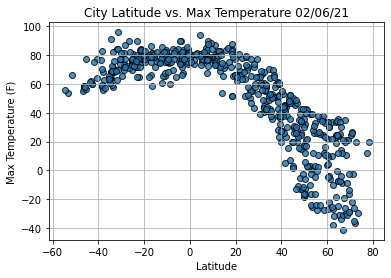

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

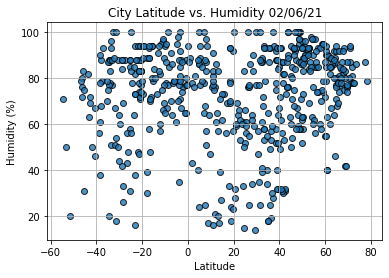

In [39]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

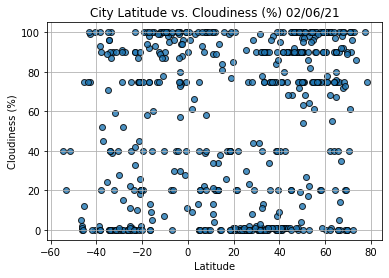

In [40]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

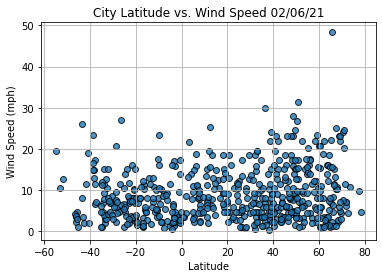

In [41]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()